In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from torch.utils.data import TensorDataset, DataLoader
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

dataset = np.load('dataset_preprocessed.npy')

possible_status = ['0: AddWeight', '1: Normal', '2: PressureGain_constant', '3: PropellerDamage_bad', '4: PropellerDamage_slight']
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 0:16], dataset[:, 16], test_size=0.2)
print(X_train.shape)
rfc = RandomForestClassifier(random_state=3407)

rfc = rfc.fit(X_train, y_train)

score_r = rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)

print("Random Forest: {}" .format(score_r))
print(classification_report(y_test, y_pred))


(175824, 16)
Random Forest: 0.9759304759304759
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9759
         1.0       0.99      0.96      0.98      6401
         2.0       1.00      0.99      1.00      9426
         3.0       0.95      0.96      0.96      8977
         4.0       0.94      0.96      0.95      9393

    accuracy                           0.98     43956
   macro avg       0.98      0.97      0.98     43956
weighted avg       0.98      0.98      0.98     43956


In [13]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9752    5    2    0    0]
 [  21 6129    9   69  173]
 [   1    6 9371   11   37]
 [   0    3    2 8643  329]
 [   4   22    7  357 9003]]


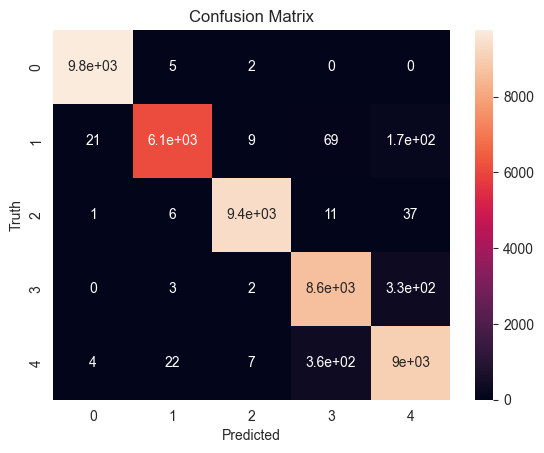

In [14]:
plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()